In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 깨짐 문제
from matplotlib import font_manager, rc

# 그래프 배경
sns.set(style = "darkgrid")

# 그래프 바로 보기
%matplotlib inline

In [2]:
#export_au 파일 불러오기
export_au=pd.read_csv('C:/2nd_project/data_set/export_import_csv/export_australia.csv')

In [18]:
export_au.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5227 entries, 0 to 5226
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HS                      5227 non-null   int64  
 1   BEC                     5227 non-null   float64
 2   Product label           5227 non-null   object 
 3   Exported value in 2012  5227 non-null   int64  
 4   Exported value in 2013  5227 non-null   int64  
 5   Exported value in 2014  5227 non-null   int64  
 6   Exported value in 2015  5227 non-null   int64  
 7   Exported value in 2016  5227 non-null   int64  
 8   Exported value in 2017  5227 non-null   int64  
 9   Exported value in 2018  5227 non-null   int64  
 10  Exported value in 2019  5227 non-null   int64  
 11  Exported value in 2020  5227 non-null   int64  
 12  Exported value in 2021  5227 non-null   int64  
 13  Unnamed: 12             0 non-null      float64
dtypes: float64(2), int64(11), object(1)
memo

In [19]:
#BEC에서 .0을 빼주기 위해 일단 int로 형변환 후 문자열로 형변환
export_au_complete=export_au_complete.astype({'BEC':'int64'})
#export_au_complete.astype({'BEC':'int64'})라고만 쓰면 형변환이 안될 때도 있음. 왜????
export_au_complete=export_au_complete.astype({'BEC':'str'})

In [20]:
#왼쪽을 기준으로 6번째 자리까지 빈 곳이 있다면 x로 채워넣음(2111->2111xx)
export_au_complete['BEC']= export_au_complete['BEC'].str.ljust(6, 'x')

In [21]:
#1차 산품만 찾기
export_au_1st=export_au_complete[export_au_complete['BEC'].str[2:] == '11xx']
export_au_1st_sum=export_au_complete[export_au_complete['BEC'].str[2:] == '11xx'].sum()

In [22]:
#중간재만 찾기('12xx'를 찾을 때 반드시 str[2:] == '12xx'로!!!, str[2:4]=='12'로 하면 1210,1220도 포함되어버림!!!)
export_au_intermediate=export_au_complete.loc[(export_au_complete['BEC'].str[2:] == '12xx') | (export_au_complete['BEC'].str[2:] == '1210') | (export_au_complete['BEC'].str[2:] == '1220')]
export_au_intermediate_sum=export_au_intermediate.sum()

In [23]:
#최종재만 찾기('2xxx'를 찾을 때 반드시 str[2:] == '2xxx'로!!!, str[2]=='2'로 하면 2010,2020도 포함되어버림!!!!!!!!!!!!!!!!!!!!!! )
export_au_final=export_au_complete.loc[(export_au_complete['BEC'].str[2:] == '2xxx') | (export_au_complete['BEC'].str[2:] == '2010') | (export_au_complete['BEC'].str[2:] == '2020') | (export_au_complete['BEC'].str[2:] == '3101') | (export_au_complete['BEC'].str[2:] == '3102') | (export_au_complete['BEC'].str[2:] == '3201') | (export_au_complete['BEC'].str[2:] == '3202')]
export_au_final_sum=export_au_final.sum()

In [24]:
export_au_final

,HS,BEC,Product label,Exported value in 2012,Exported value in 2013,Exported value in 2014,Exported value in 2015,Exported value in 2016,Exported value in 2017,Exported value in 2018,Exported value in 2019,Exported value in 2020,Exported value in 2021,Unnamed: 12
2,271111,213101,"Natural gas, liquefied",14676410,14824997,16451316,12582034,13559824,19937263,31970665,35167504,26312442,36957140,NaN
9,20230,113101,"Frozen, boneless meat of bovine animals",2828207,3370846,4371609,4277980,3075554,3223065,3694760,4468083,3749032,3750481,NaN
12,20130,113101,"Fresh or chilled bovine meat, boneless",1921467,1891428,2273194,2451140,2201799,2223558,2492495,2630413,2669019,2892798,NaN
17,271019,213101,"Medium oils and preparations, of petroleum or ...",2477132,2005445,1927252,1300465,1372687,1470569,1856943,1413859,1283906,1956440,NaN
20,20442,113101,"Frozen cuts of sheep, with bone in (excluding ...",625049,822870,1044738,759880,687072,995968,1177708,1418754,1208444,1518543,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5190,160431,113201,Caviar,0,0,0,4,0,0,13,12,1,0,NaN
5191,160561,113201,"Sea cucumbers, prepared or preserved (excludin...",0,58,169,0,2,3,57,0,0,0,NaN
5224,844530,412010,Textile doubling or twisting machines,51,269,144,292,0,0,0,88,0,0,NaN
5225,852851,613202,Monitors of a kind solely or principally used ...,32586,33001,34558,34220,15801,0,0,0,0,0,NaN


In [33]:
#export_au_BEC=export_au_complete.groupby(['BEC'], as_index=False)

In [40]:
export_au_BEC=export_au_complete.groupby('BEC').sum()

In [50]:
export_au_BEC

,HS,Exported value in 2012,Exported value in 2013,Exported value in 2014,Exported value in 2015,Exported value in 2016,Exported value in 2017,Exported value in 2018,Exported value in 2019,Exported value in 2020,Exported value in 2021,Unnamed: 12
BEC,,,,,,,,,,,,
0xxxxx,711890,755562,1009486,640719,630877,735766,518517,609248,600536,1032862,1939936,0.0
1111xx,32545735,13432460,13504826,12427181,11117044,9692497,11662865,9782926,7996960,7982204,15730831,0.0
111210,56674606,3726545,3859362,3842381,3208864,2968681,3136201,3252616,3161341,3280341,4155267,0.0
111220,841990,12368,15491,22415,16712,16494,21243,24413,21833,23775,20515,0.0
112010,54852801,533918,514098,506938,423182,380499,410047,445149,455219,437523,488063,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
812020,13661531,94126,87463,120891,118995,102669,116104,154951,104987,96584,97471,0.0
813101,721110,63,140,251,137,341,748,87,61,107,112,0.0
813201,930690,34875,65557,56036,33541,21328,11176,11221,8884,13427,1518,0.0


In [45]:
export_au_BEC.sum()

HS                        2.755974e+09
Exported value in 2012    2.626785e+08
Exported value in 2013    2.566785e+08
Exported value in 2014    2.526803e+08
Exported value in 2015    1.913201e+08
Exported value in 2016    1.893892e+08
Exported value in 2017    2.297222e+08
Exported value in 2018    2.545254e+08
Exported value in 2019    2.725796e+08
Exported value in 2020    2.545314e+08
Exported value in 2021    3.455999e+08
Unnamed: 12               0.000000e+00
dtype: float64

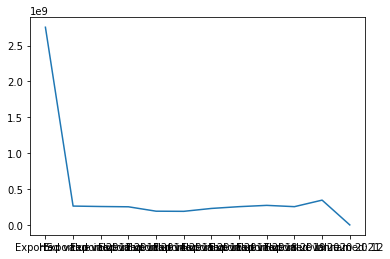

In [54]:
plt.plot(export_au_BEC.sum())

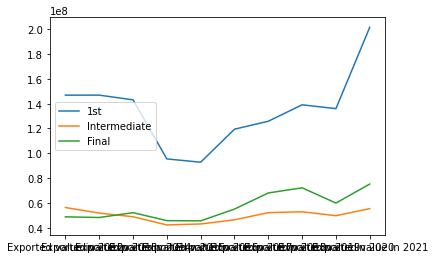

In [27]:
#가공단계별(1차 산품, 중간재, 소비재) 수출금액
plt.plot(export_au_1st_sum[3:13], label='1st')
plt.plot(export_au_intermediate_sum[3:13], label='Intermediate')
plt.plot(export_au_final_sum[3:13], label='Final')
plt.legend(loc=6)